# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support, recall_score, precision_score
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, cross_val_predict
import warnings
warnings.filterwarnings("ignore")

# LOADING DATA

In [2]:
name= pd.read_csv("creditcard.csv")

# CHECKING THE FIRST FIVE ROW

In [3]:
name.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# CHECK THE FIRST LAST ROW

In [4]:
name.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# CHECK ROW AND COLUMN

In [5]:
name.shape

(284807, 31)

# CHECKING THE COLUMNS OR VARIABLES IN THE DATASET

In [6]:
name.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# IDENTIFYING THE COLUMNS TYPES

In [7]:
name.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

# MISSING VALUES

In [8]:
name.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# HANDLING MISSING VALUES

In [9]:
name.dropna(inplace=True)

# DISCRIPTIVE STATISTICS

In [10]:
name.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
classes = name["Class"].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

# DATA VISUALIZATION

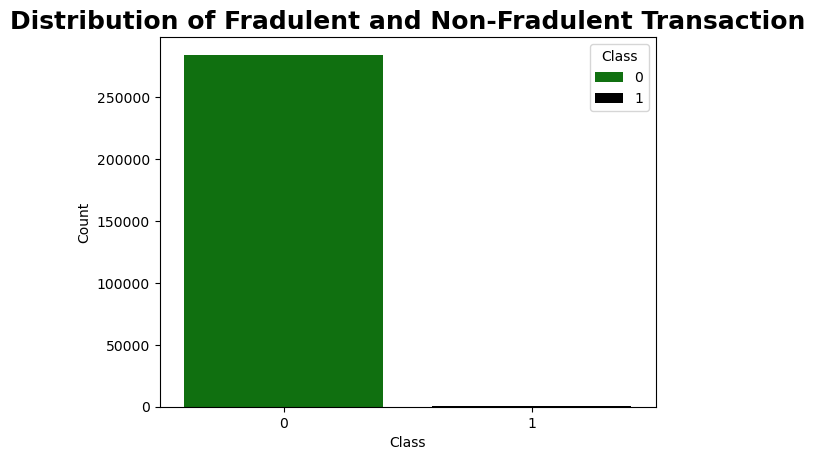

In [12]:
sns.countplot(x="Class", data=name, hue= 'Class', palette=('green', 'black'))
plt.title("Distribution of Fradulent and Non-Fradulent Transaction", fontweight='bold', size=18)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

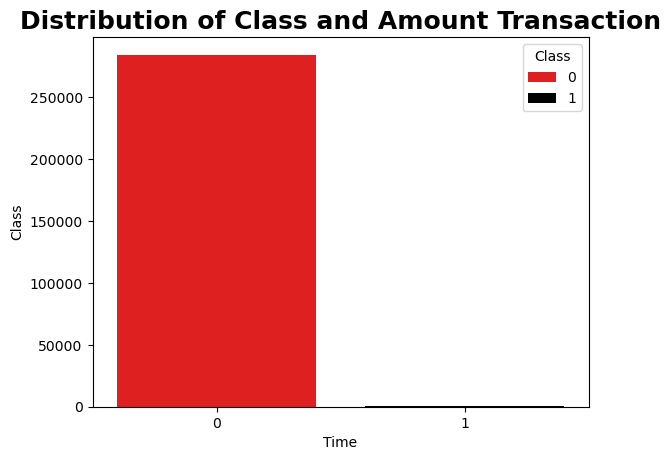

In [13]:
sns.countplot(x="Class", data=name, hue= 'Class', palette=('red', 'black'))
plt.title("Distribution of Class and Amount Transaction", fontweight='bold', size=18)
plt.xlabel("Time")
plt.ylabel("Class")
plt.show()

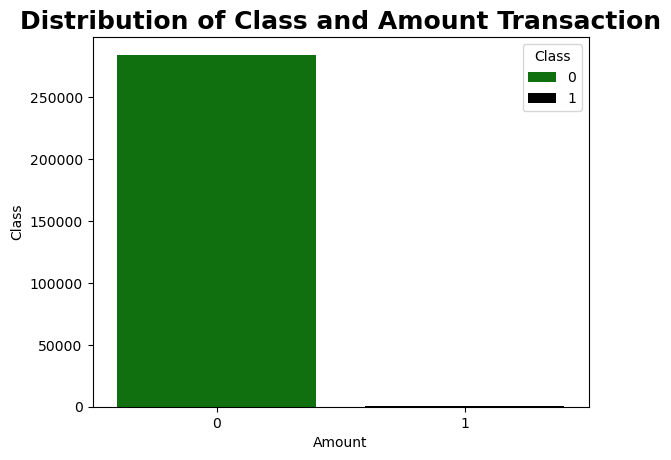

In [14]:
sns.countplot(x="Class", data=name, hue= 'Class', palette=('green', 'black'))
plt.title("Distribution of Class and Amount Transaction", fontweight='bold', size=18)
plt.xlabel("Amount")
plt.ylabel("Class")
plt.show()

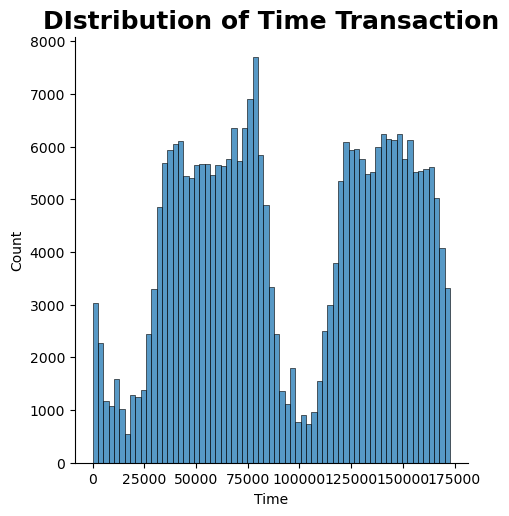

In [15]:

sns.displot(name["Time"])
plt.title("DIstribution of Time Transaction", fontweight='bold', size=18)

plt.show()


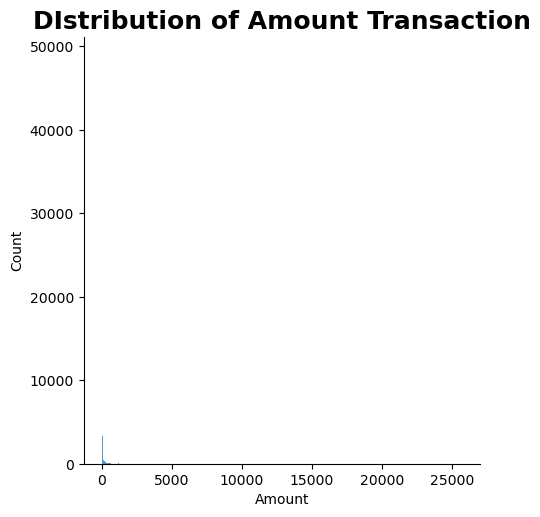

In [16]:

sns.displot(name["Amount"])
plt.title("DIstribution of Amount Transaction", fontweight='bold', size=18)

plt.show()


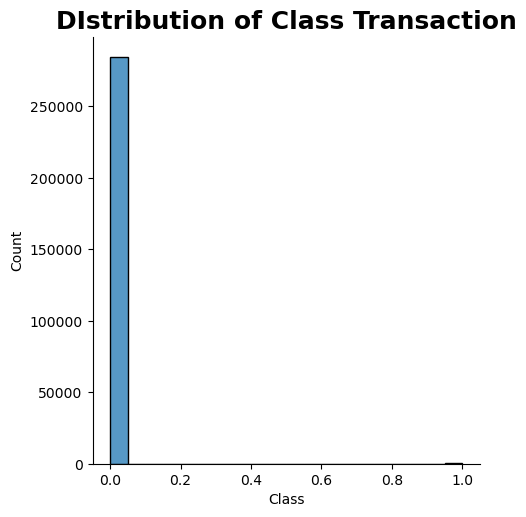

In [17]:

sns.displot(name["Class"])
plt.title("DIstribution of Class Transaction", fontweight='bold', size=18)

plt.show()


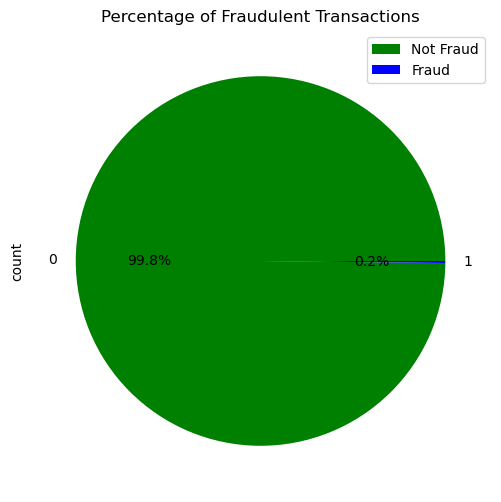

In [18]:
plt.figure(figsize=(6, 6))
name['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'blue'])
plt.title('Percentage of Fraudulent Transactions')
plt.legend(['Not Fraud', 'Fraud'])
plt.show()

# MACHINE LEARNING

# SPLIT THE DATASET INTO FEATURES (X) AND LABELS (Y)


In [19]:
x = name.drop('Class', axis=1)
y = name['Class']


# SPLIT THE DATASET INTO TRAINING AND TESTING SETS

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# SCALE THE NUMERICAL FEATURES

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# APPLYING MACHINE LEARNING ALGORITHMS

# Decision TreeClassifier

Decision TreeClassifier:
[[56830    34]
 [   23    75]]
              precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00     56864
       Fraud       0.69      0.77      0.72        98

    accuracy                           1.00     56962
   macro avg       0.84      0.88      0.86     56962
weighted avg       1.00      1.00      1.00     56962



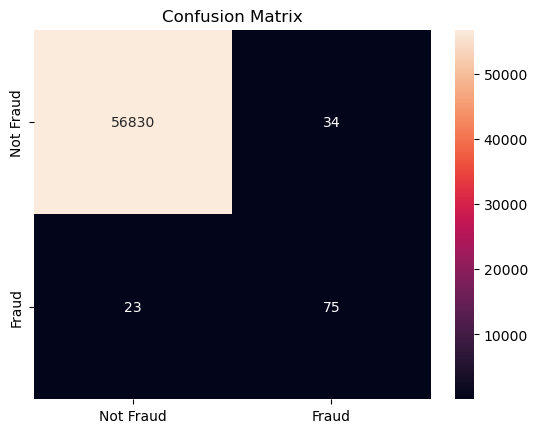

In [22]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(x_train, y_train)
dtree_predictions = dtree_model.predict(x_test)
print("Decision TreeClassifier:")
print (confusion_matrix(y_test, dtree_predictions))
print(classification_report(y_test, dtree_predictions, target_names=["Not fraud", "Fraud"]))
cm = confusion_matrix(y_test, dtree_predictions)
sns.heatmap(cm, annot=True, fmt="g",
xticklabels=["Not Fraud", "Fraud"],
yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.show()


# Logistic Regression

Logistic Regression:
[[56854    10]
 [   43    55]]
              precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00     56864
       Fraud       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



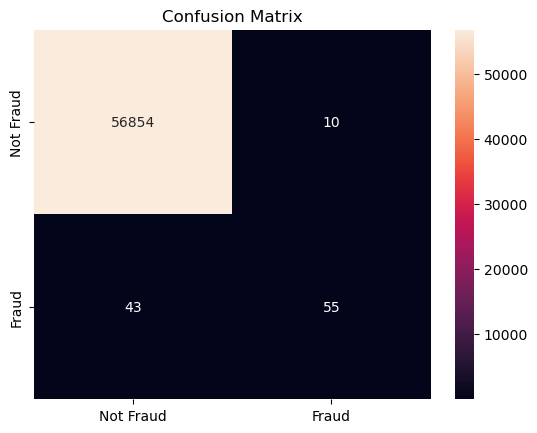

In [23]:
# Logistic Regression 
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)
print("Logistic Regression:")
print (confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions, target_names=["Not fraud", "Fraud"]))
cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm, annot=True, fmt="g",
xticklabels=["Not Fraud", "Fraud"],
yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.show()


# Random Forest Classifier

Random Forest:
[[56861     3]
 [   22    76]]
              precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00     56864
       Fraud       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



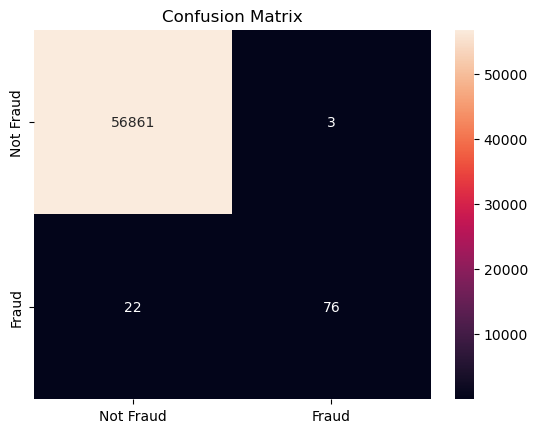

In [24]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
print("Random Forest:")
print (confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions, target_names=["Not fraud", "Fraud"]))
cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm, annot=True, fmt="g",
xticklabels=["Not Fraud", "Fraud"],
yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.show()


# Support Vector Machine

Support Vector Machine:
[[56862     2]
 [   37    61]]
              precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00     56864
       Fraud       0.97      0.62      0.76        98

    accuracy                           1.00     56962
   macro avg       0.98      0.81      0.88     56962
weighted avg       1.00      1.00      1.00     56962



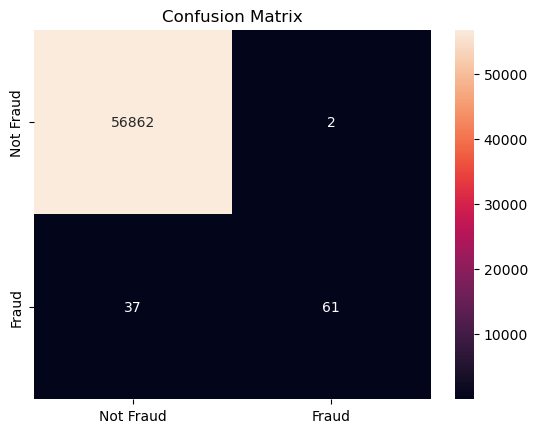

In [25]:
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
svm_predictions = svm_model.predict(x_test)
print("Support Vector Machine:")
print (confusion_matrix(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions, target_names=["Not fraud", "Fraud"]))
cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(cm, annot=True, fmt="g",
xticklabels=["Not Fraud", "Fraud"],
yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.show()

# KNeighbors Classifier

KNeighborsClassifier:
[[56859     5]
 [   22    76]]
              precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00     56864
       Fraud       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



<Axes: >

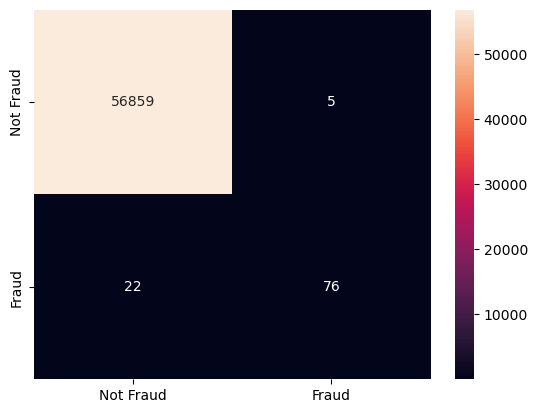

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)
print("KNeighborsClassifier:")
print (confusion_matrix(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions, target_names=["Not fraud", "Fraud"]))
cm = confusion_matrix(y_test, knn_predictions)
sns.heatmap(cm, annot=True, fmt="g",
xticklabels=["Not Fraud", "Fraud"],
yticklabels=["Not Fraud", "Fraud"])


# ROC CURVE

In [27]:
print("Logistic Regression: ", roc_auc_score(y_test, lr_predictions))
print("Random Forest: ", roc_auc_score(y_test, rf_predictions))
print("Support Vector Machine: ", roc_auc_score(y_test, svm_predictions))
print("KNeighbors Classifier: ", roc_auc_score(y_test, knn_predictions))
print("DecisionTreeClassifier: ", roc_auc_score(y_test, dtree_predictions))


Logistic Regression:  0.7805243158039805
Random Forest:  0.8877287233126226
Support Vector Machine:  0.8112069039771227
KNeighbors Classifier:  0.887711137493827
DecisionTreeClassifier:  0.8823541023049626


# ACCURACY

In [28]:
print ("Accuracy of the models :")
print("Logistic regression:", accuracy_score(y_test, lr_predictions))
print("Decision Tree Classifier:", accuracy_score(y_test, dtree_predictions))
print("Random Forest:", accuracy_score(y_test, rf_predictions))
print("Support Vector Machine:", accuracy_score(y_test, svm_predictions))
print("KNeigbors Classifier:", accuracy_score(y_test, knn_predictions))

Accuracy of the models :
Logistic regression: 0.9990695551420246
Decision Tree Classifier: 0.9989993328885924
Random Forest: 0.9995611109160493
Support Vector Machine: 0.9993153330290369
KNeigbors Classifier: 0.9995259997893332


# PRECISION

In [29]:
print ("Precision of the models :")
print("Logistic regression:", precision_score(y_test, lr_predictions))
print("Decision Tree Classifier:", precision_score(y_test, dtree_predictions))
print("Random Forest:", precision_score(y_test, rf_predictions))
print("Support Vector Machine:", precision_score(y_test, svm_predictions))
print("KNeigbors Classifier:", precision_score(y_test, knn_predictions))


Precision of the models :
Logistic regression: 0.8461538461538461
Decision Tree Classifier: 0.6880733944954128
Random Forest: 0.9620253164556962
Support Vector Machine: 0.9682539682539683
KNeigbors Classifier: 0.9382716049382716


# RECALL

In [30]:
print ("Recall of the models :")
print("Logistic regression:", recall_score(y_test, lr_predictions))
print("Decision Tree Classifier:", recall_score(y_test, dtree_predictions))
print("Random Forest:", recall_score(y_test, rf_predictions))
print("Support Vector Machine:", recall_score(y_test, svm_predictions))
print("KNeigbors Classifier:", recall_score(y_test, knn_predictions))

Recall of the models :
Logistic regression: 0.5612244897959183
Decision Tree Classifier: 0.7653061224489796
Random Forest: 0.7755102040816326
Support Vector Machine: 0.6224489795918368
KNeigbors Classifier: 0.7755102040816326


# F1_SCORES

In [31]:
print ("F1-scores of the models :")
print("Logistic regression:", f1_score(y_test, lr_predictions))
print("Decision Tree Classifier:", f1_score(y_test, dtree_predictions))
print("Random Forest:", f1_score(y_test, rf_predictions))
print("Support Vector Machine:", f1_score(y_test, svm_predictions))
print("KNeigbors Classifier:", f1_score(y_test, knn_predictions))

F1-scores of the models :
Logistic regression: 0.6748466257668712
Decision Tree Classifier: 0.7246376811594203
Random Forest: 0.8587570621468926
Support Vector Machine: 0.7577639751552795
KNeigbors Classifier: 0.8491620111731844


# MODEL FOR ROC-CURVE

In [32]:
final_data = pd.DataFrame({"Models":["LR","RF","SVM", "KNN", "DTREE"], "ROC":
[roc_auc_score(y_test, lr_predictions)*100, roc_auc_score(y_test, rf_predictions)*100,
 roc_auc_score(y_test, svm_predictions)*100, roc_auc_score(y_test, knn_predictions)*100,  roc_auc_score(y_test,
dtree_predictions)*100]})
final_data

,Models,ROC
0,LR,78.052432
1,RF,88.772872
2,SVM,81.120690
3,KNN,88.771114
4,DTREE,88.235410


# MODEL FOR ACCURACY

In [33]:
final_data = pd.DataFrame({"Models":["LR", "RF","SVM", "KNN", "DTREE"], "ACC":
[accuracy_score(y_test,lr_predictions)*100, accuracy_score(y_test,rf_predictions)*100, accuracy_score(y_test,svm_predictions)*100,
 accuracy_score(y_test,knn_predictions)*100,
 accuracy_score(y_test, dtree_predictions)*100,
 ]})
final_data

,Models,ACC
0,LR,99.906956
1,RF,99.956111
2,SVM,99.931533
3,KNN,99.952600
4,DTREE,99.899933


# MODEL FOR PRECISION

In [34]:
final_data = pd.DataFrame({"Models":["LR", "RF","SVM", "KNN", "DTREE"], "PRE":
[precision_score(y_test,lr_predictions)*100, precision_score(y_test,rf_predictions)*100,
 precision_score(y_test,svm_predictions)*100, precision_score(y_test,knn_predictions)*100,
 precision_score(y_test, dtree_predictions)*100]})
final_data


,Models,PRE
0,LR,84.615385
1,RF,96.202532
2,SVM,96.825397
3,KNN,93.827160
4,DTREE,68.807339


# MODEL FOR RECALL

In [35]:
final_data = pd.DataFrame({"Models":["LR", "RF","SVM", "KNN", "DTREE"],
"RECALL": [recall_score(y_test,lr_predictions)*100, recall_score(y_test,rf_predictions)*100, recall_score(y_test,svm_predictions)*100, recall_score(y_test,knn_predictions)*100, recall_score(y_test, dtree_predictions)*100,]})
final_data

,Models,RECALL
0,LR,56.122449
1,RF,77.551020
2,SVM,62.244898
3,KNN,77.551020
4,DTREE,76.530612


# MODEL FOR F1_SCORE

In [36]:
final_data = pd.DataFrame({"Models":["LR", "RF","SVM", "KNN", "DTREE"], "F1":
[f1_score(y_test,lr_predictions)*100, f1_score(y_test,rf_predictions)*100,f1_score(y_test,svm_predictions)*100,
 f1_score(y_test,knn_predictions)*100, 
 f1_score(y_test, dtree_predictions)*100]})
final_data

,Models,F1
0,LR,67.484663
1,RF,85.875706
2,SVM,75.776398
3,KNN,84.916201
4,DTREE,72.463768


# ROC CURVE

Text(0.5, 1.0, 'Precision Recall Curve for Decision tree Classifier')

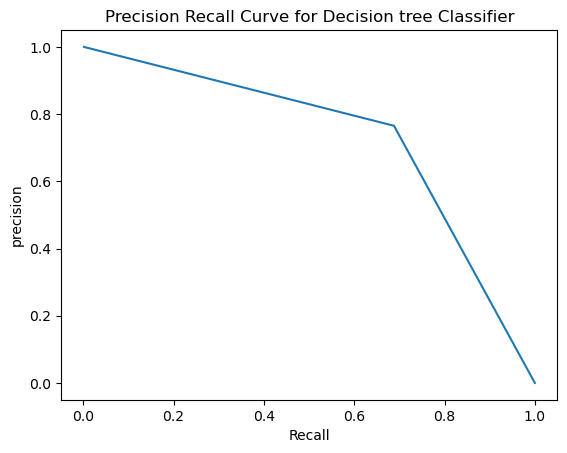

In [37]:
dtree_model_prob = dtree_model.predict_proba(x_test)[:,1]
precision, recall, F1_Score = precision_recall_curve(y_test, dtree_model_prob )
plt.plot(precision, recall)
plt.xlabel("Recall")
plt.ylabel("precision")
plt.title("Precision Recall Curve for Decision tree Classifier")


Text(0.5, 1.0, 'Precision Recall Curve for K-Neighbor Classifier')

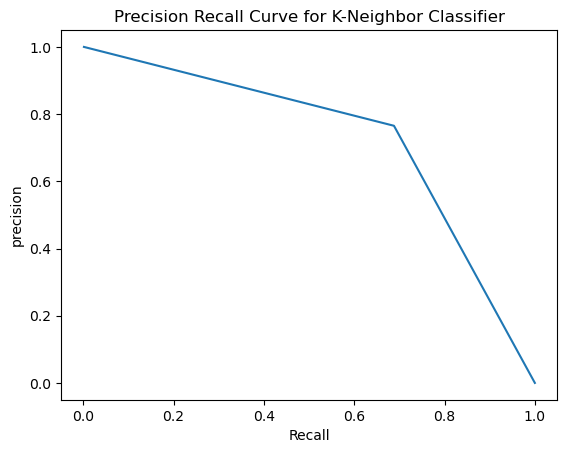

In [38]:
knn_model_prob = dtree_model.predict_proba(x_test)[:,1]
precision, recall, F1_Score = precision_recall_curve(y_test, knn_model_prob )
plt.plot(precision, recall)
plt.xlabel("Recall")
plt.ylabel("precision")
plt.title("Precision Recall Curve for K-Neighbor Classifier")


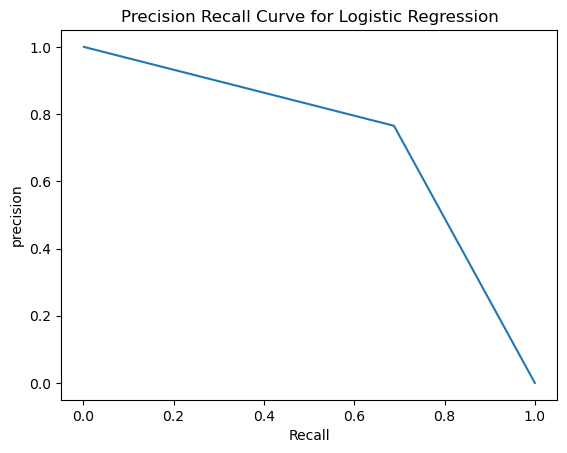

In [39]:
lr_model_prob = dtree_model.predict_proba(x_test)[:,1]
precision, recall, F1_Score = precision_recall_curve(y_test, lr_model_prob )
plt.title("Precision Recall Curve for Logistic Regression")
plt.plot(precision, recall)
plt.xlabel("Recall")
plt.ylabel("precision")
plt.show()


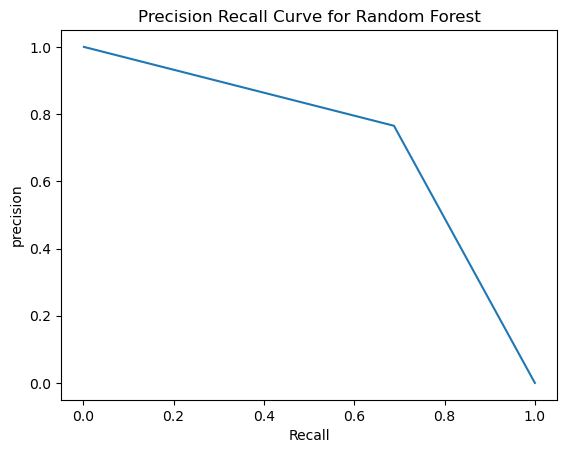

In [40]:
rf_model_prob = dtree_model.predict_proba(x_test)[:,1]
precision, recall, F1_Score = precision_recall_curve(y_test, rf_model_prob )
plt.plot(precision, recall)
plt.xlabel("Recall")
plt.ylabel("precision")
plt.title("Precision Recall Curve for Random Forest")
plt.show()

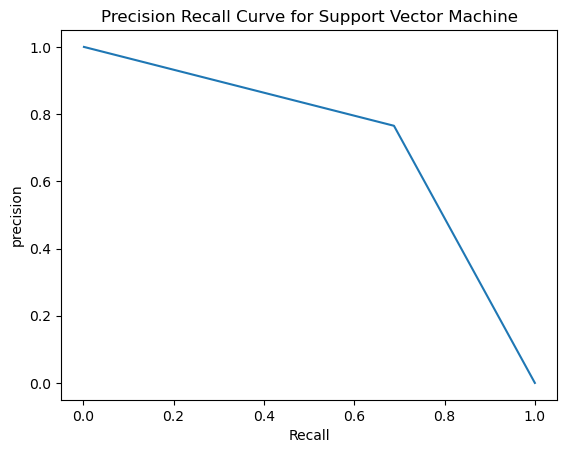

In [41]:
svm_model_prob = dtree_model.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, svm_model_prob )
plt.plot(precision, recall)
plt.xlabel("Recall")
plt.ylabel("precision")
plt.title("Precision Recall Curve for Support Vector Machine")
plt.show()

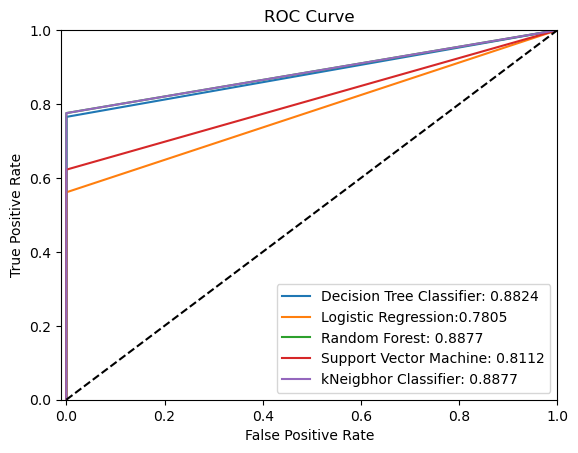

In [42]:
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr_predictions)
svm_fpr, svm_tpr, svm_threshold = roc_curve(y_test, svm_predictions)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test, knn_predictions)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_predictions)
dtree_fpr, dtree_tpr, dtree_threshold = roc_curve(y_test, dtree_predictions)


#def graph_roc_curve_multiple(lr_fpr, lr_tpr, svm_fpr, svm_tpr, dtree_fpr, dtree_tpr, knn_fpr, knn_tpr, rf_tpr, rf_fpr):
#plt.figure (figsize=(16,8))
plt.plot(dtree_fpr, dtree_tpr, label= "Decision Tree Classifier: {:.4f}".format(roc_auc_score(y_test, dtree_predictions)))

plt.plot(lr_fpr, lr_tpr,label="Logistic Regression:{:.4f}".format(roc_auc_score(y_test,lr_predictions)))
plt.plot(rf_fpr, rf_tpr,label="Random Forest: {:.4f}".format(roc_auc_score(y_test,
rf_predictions)))
plt.plot(svm_fpr, svm_tpr, label="Support Vector Machine: {:.4f}".format(roc_auc_score(y_test, svm_predictions)))
plt.plot(knn_fpr, knn_tpr, label="kNeigbhor Classifier: {:.4f}".format(roc_auc_score(y_test,knn_predictions)))
plt.plot([0, 1], [0, 1], "k--")
plt.axis([-0.01, 1, 0, 1])
plt.xlabel ("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


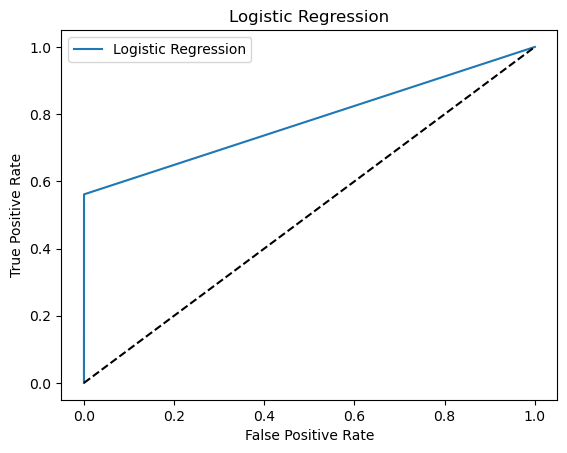

In [43]:
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.legend()
plt.show()


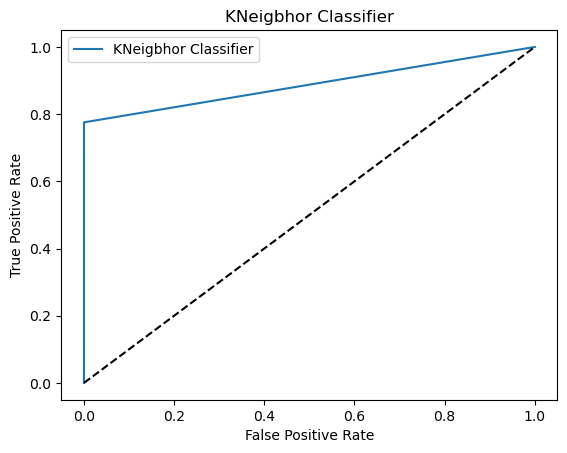

In [44]:
plt.plot(knn_fpr, knn_tpr, label='KNeigbhor Classifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNeigbhor Classifier')
plt.legend()
plt.show()